In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
esd = pd.read_csv('spam.csv',encoding = 'latin-1')

In [3]:
esd.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
esd.shape

(5572, 5)

In [5]:
esd.size

27860

In [6]:
esd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
esd.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [8]:
esd.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [9]:
esd.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)

In [10]:
esd.sample(5)

,Target,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
1079,ham,Me too watching surya movie only. . .after 6 p...,NaN,NaN,NaN
3624,ham,I want to tel u one thing u should not mistake...,NaN,NaN,NaN
2540,ham,"They said if its gonna snow, it will start aro...",NaN,NaN,NaN
72,ham,HI BABE IM AT HOME NOW WANNA DO SOMETHING? XX,NaN,NaN,NaN
3429,ham,You've always been the brainy one.,NaN,NaN,NaN


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
esd['Target'] = encoder.fit_transform(esd['Target'])

In [13]:
esd.head(5)

,Target,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [14]:
esd.isnull().sum()

Target           0
Text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [15]:
esd.duplicated().sum()

403

In [16]:
esd = esd.drop_duplicates(keep='first')

In [17]:
esd.duplicated().sum()

0

In [18]:
esd.shape

(5169, 5)

In [19]:
esd.head(6)

,Target,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,1,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN


In [20]:
esd['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

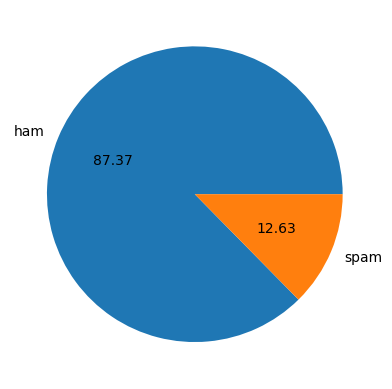

In [21]:
plt.pie(esd['Target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Mrinalee
[nltk_data]     Diwale\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
esd['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [25]:
esd['num_characters'] = esd['Text'].apply(len)

In [26]:
esd.head()

,Target,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [27]:
esd['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [28]:
esd['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [29]:
esd['num_words'] = esd['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
esd.head(5)

,Target,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15


In [31]:
esd['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [32]:
esd['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Text, Length: 5169, dtype: int64

In [33]:
esd['num_sentences'] = esd['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
esd.head()

,Target,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [35]:
esd[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
esd[esd['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

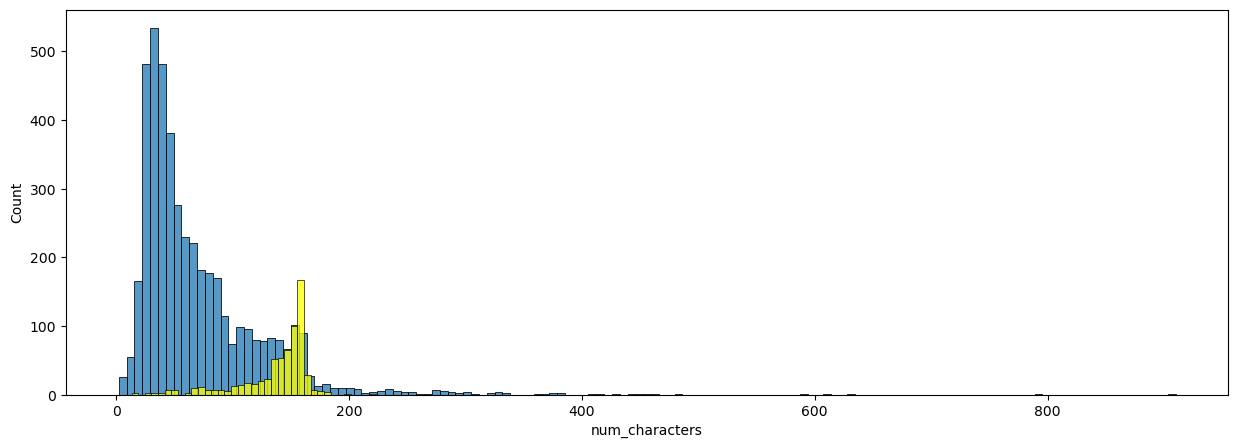

In [37]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.histplot(esd[esd['Target']==0]['num_characters'])
sns.histplot(esd[esd['Target']==1]['num_characters'], color='yellow')

<Axes: xlabel='num_words', ylabel='Count'>

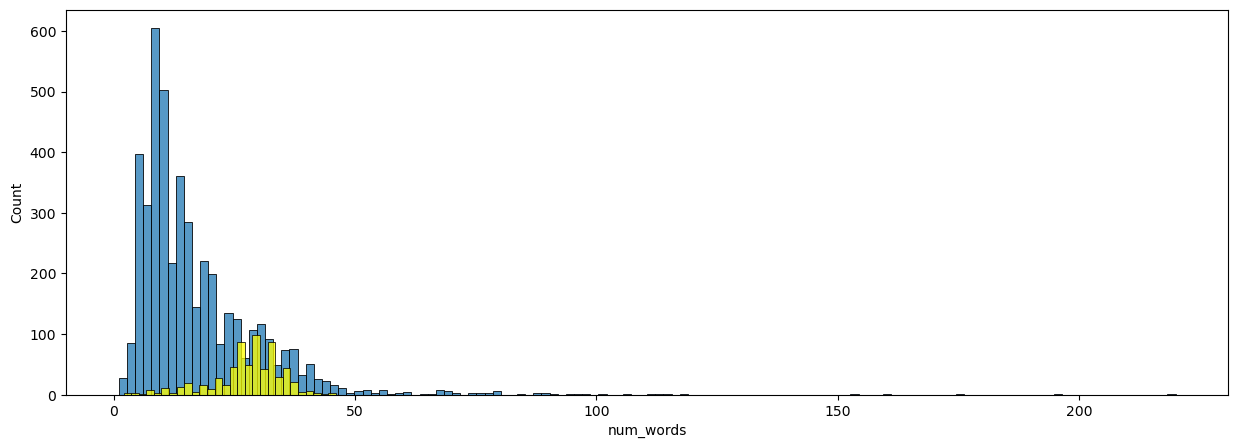

In [38]:
plt.figure(figsize=(15,5))
sns.histplot(esd[esd['Target']==0]['num_words'])
sns.histplot(esd[esd['Target']==1]['num_words'], color='yellow')

<Axes: xlabel='num_sentences', ylabel='Count'>

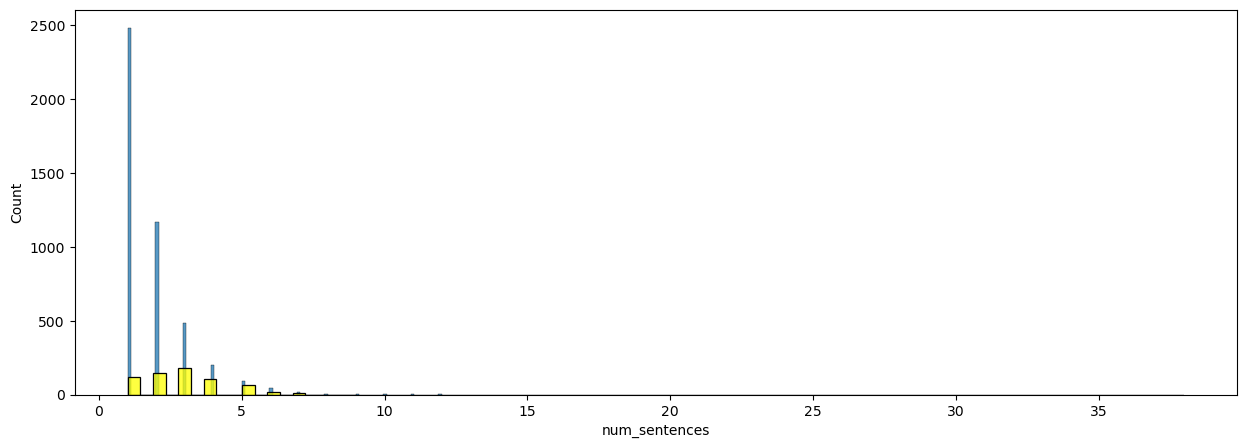

In [39]:
plt.figure(figsize=(15,5))
sns.histplot(esd[esd['Target']==0]['num_sentences'])
sns.histplot(esd[esd['Target']==1]['num_sentences'], color='yellow')

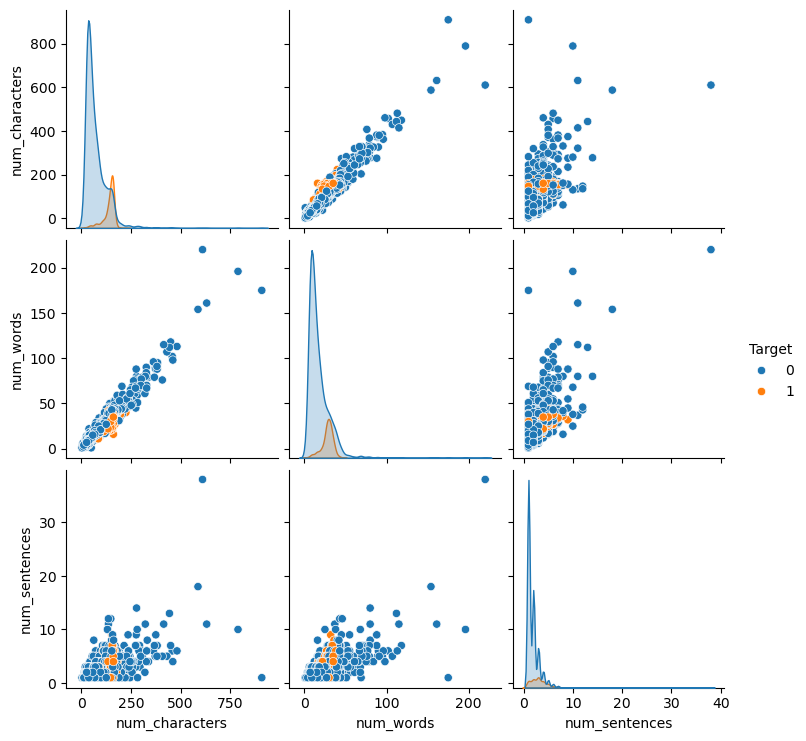

In [40]:
sns.pairplot(esd, hue='Target')

In [41]:
esd.corr(numeric_only = True)

,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

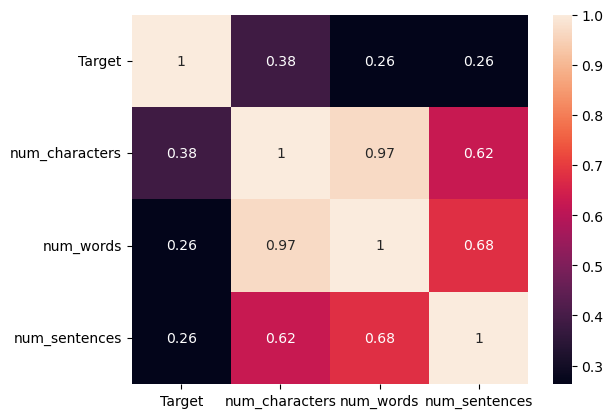

In [42]:
sns.heatmap(esd.corr(numeric_only = True), annot=True)

In [43]:
def transform_text1(text1):
    text1 = text1.lower()
    return text1

In [44]:
transform_text1('HI how Are You')

'hi how are you'

In [45]:

def transform_text2(text2):
    text2 = nltk.word_tokenize(text2)
    return text2

In [46]:

transform_text2('HI how Are You')

['HI', 'how', 'Are', 'You']

In [47]:
def transform_text3(text3):
    y=[]
    for i in text3:
        if i.isalnum():
            y.append(i)
    return y

In [48]:
transform_text3('HI how Are  % @ 20 45 * You')

['H', 'I', 'h', 'o', 'w', 'A', 'r', 'e', '2', '0', '4', '5', 'Y', 'o', 'u']

In [49]:
def transform_text3a(text3a):
    text3a = text3a.lower()
    text3a = nltk.word_tokenize(text3a)
    y_a=[]
    for i in text3a:
        if i.isalnum():
            y_a.append(i)
    return y_a

In [50]:
transform_text3a('HI how Are  % @ 20 45 * You')

['hi', 'how', 'are', '20', '45', 'you']

In [52]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Mrinalee
[nltk_data]     Diwale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [54]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
def transform_text4(text4):
    text4 = text4.lower()
    text4 = nltk.word_tokenize(text4)
    y_4=[]
    for i in text4:
        if i.isalnum():
            y_4.append(i)
    text4 = y_4[:]
    y_4.clear()
    for i in text4:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y_4.append(i)
    return y_4

In [56]:
transform_text4('HI how Are  % @ 20 45 * You')

['hi', '20', '45']

In [57]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [58]:
def transform_text5(text5):
    text5 = text5.lower()
    text5 = nltk.word_tokenize(text5)
    y_5=[]
    for i in text5:
        if i.isalnum():
            y_5.append(i)
    text5 = y_5[:]
    y_5.clear()
    for i in text5:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y_5.append(i)
    text5 = y_5[:]
    text5.clear()
    for i in text5:
        y_5.append(ps.stem(i))
    return " ".join(y_5)

In [59]:
transform_text5('I love youtube lectures. What about you?')

'love youtube lectures'

In [60]:
esd['Text'][200]

'I sent you  &lt;#&gt;  bucks'

In [61]:
transform_text5('I sent you $%#^$@@$; bucks')

'sent bucks'

In [62]:
esd['Text'][200]

'I sent you  &lt;#&gt;  bucks'

In [63]:
transform_text5('But i ll b going 2 auch on mon. My sis need 2 take smth.')

'b going 2 auch mon sis need 2 take smth'

In [64]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    text.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [65]:
esd['Text'].apply(transform_text)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u pound prize 2 claim...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [66]:
esd['Transformed_text'] = esd['Text'].apply(transform_text)

In [67]:
esd.head(5)

,Target,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goes usf lives around though


In [68]:
from wordcloud import WordCloud
from PIL import Image, ImageDraw, ImageFont
wc = WordCloud(width = 800, height=800, min_font_size=10, background_color = 'white')

In [69]:
esd['Target']==1

0       False
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: Target, Length: 5169, dtype: bool

In [70]:
esd[esd['Target']==1]

,Target,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,Transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
5,1,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,148,39,4,freemsg hey darling 3 week word back like fun ...
8,1,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,158,32,5,winner valued network customer selected receiv...
9,1,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,154,31,3,mobile 11 months u r entitled update latest co...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",NaN,NaN,NaN,136,31,3,six chances win cash 100 pounds txt csh11 send...
...,...,...,...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN,90,18,3,want explicit sex 30 secs ring 02073162414 cos...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,NaN,NaN,NaN,160,38,6,asked 3mobile 0870 chatlines inclu free mins i...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,NaN,NaN,NaN,160,35,5,contract mobile 11 mnths latest motorola nokia...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN,147,30,1,reminder o2 get pounds free call credit detail...


In [71]:
esd[esd['Target']==1]['Transformed_text']

2       free entry 2 wkly comp win fa cup final tkts 2...
5       freemsg hey darling 3 week word back like fun ...
8       winner valued network customer selected receiv...
9       mobile 11 months u r entitled update latest co...
11      six chances win cash 100 pounds txt csh11 send...
                              ...                        
5537    want explicit sex 30 secs ring 02073162414 cos...
5540    asked 3mobile 0870 chatlines inclu free mins i...
5547    contract mobile 11 mnths latest motorola nokia...
5566    reminder o2 get pounds free call credit detail...
5567    2nd time tried 2 contact u pound prize 2 claim...
Name: Transformed_text, Length: 653, dtype: object

In [72]:
esd[esd['Target']==1]['Transformed_text'].str.cat(sep=" ")

'free entry 2 wkly comp win fa cup final tkts 21st may text fa 87121 receive entry question std txt rate c apply 08452810075over18 freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send rcv winner valued network customer selected receivea prize reward claim call claim code kl341 valid 12 hours mobile 11 months u r entitled update latest colour mobiles camera free call mobile update co free 08002986030 six chances win cash 100 pounds txt csh11 send cost 6days tsandcs apply reply hl 4 info urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18 xxxmobilemovieclub use credit click wap link next txt message click http england v macedonia dont miss news txt ur national team 87077 eg england 87077 try wales scotland poboxox36504w45wq thanks subscription ringtone uk mobile charged please confirm replying yes reply charged 07732584351 rodger burns msg tried call reply sms free nokia mobile free camcorder please call 08000930705 deliv

In [73]:
wc.generate(esd[esd['Target']==1]['Transformed_text'].str.cat(sep=" "))

In [74]:
spam_wc = wc.generate(esd[esd['Target']==1]['Transformed_text'].str.cat(sep=" "))

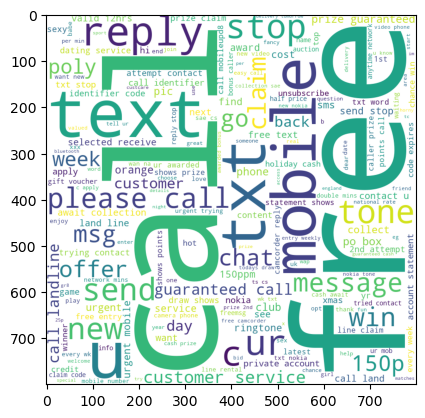

In [75]:
plt.imshow(spam_wc)

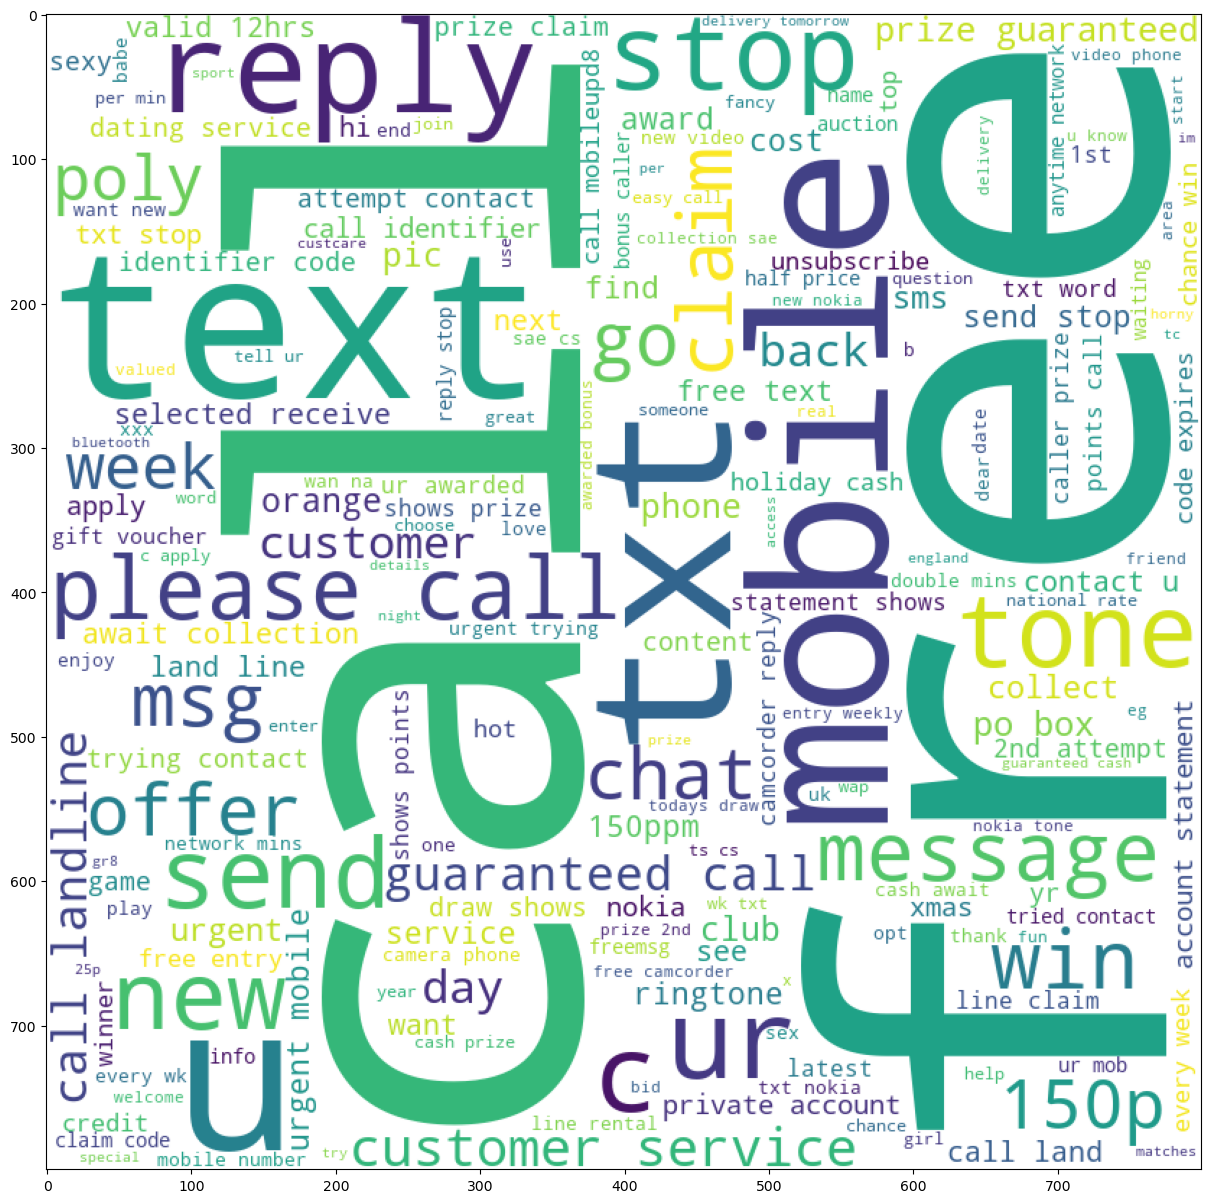

In [76]:
plt.figure(figsize=(15,15))
plt.imshow(spam_wc)

In [77]:
ham_wc = wc.generate(esd[esd['Target']==0]['Transformed_text'].str.cat(sep=" "))

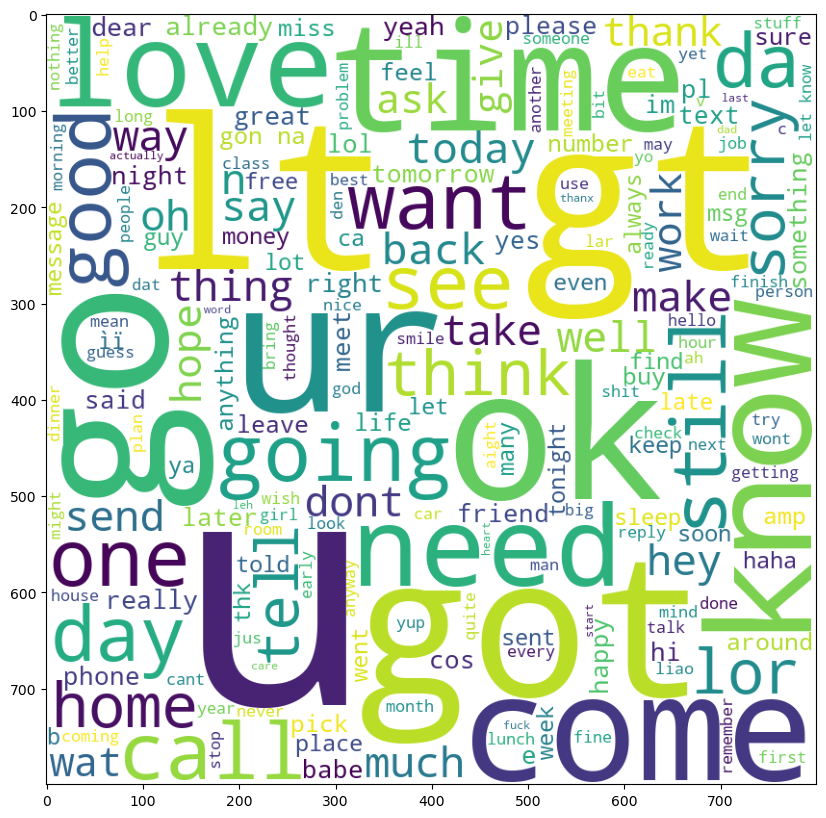

In [78]:
plt.figure(figsize=(10,10))
plt.imshow(ham_wc)

In [79]:







esd.head(5)

,Target,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goes usf lives around though


In [80]:
esd[esd['Target']==1]['Transformed_text']

2       free entry 2 wkly comp win fa cup final tkts 2...
5       freemsg hey darling 3 week word back like fun ...
8       winner valued network customer selected receiv...
9       mobile 11 months u r entitled update latest co...
11      six chances win cash 100 pounds txt csh11 send...
                              ...                        
5537    want explicit sex 30 secs ring 02073162414 cos...
5540    asked 3mobile 0870 chatlines inclu free mins i...
5547    contract mobile 11 mnths latest motorola nokia...
5566    reminder o2 get pounds free call credit detail...
5567    2nd time tried 2 contact u pound prize 2 claim...
Name: Transformed_text, Length: 653, dtype: object

In [81]:
esd[esd['Target']==1]['Transformed_text'].tolist()

['free entry 2 wkly comp win fa cup final tkts 21st may text fa 87121 receive entry question std txt rate c apply 08452810075over18',
 'freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send rcv',
 'winner valued network customer selected receivea prize reward claim call claim code kl341 valid 12 hours',
 'mobile 11 months u r entitled update latest colour mobiles camera free call mobile update co free 08002986030',
 'six chances win cash 100 pounds txt csh11 send cost 6days tsandcs apply reply hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt message click http',
 'england v macedonia dont miss news txt ur national team 87077 eg england 87077 try wales scotland poboxox36504w45wq',
 'thanks subscription ringtone uk mobile charged please confirm replying yes reply charged',
 '07732584351 rodger burns msg tried call reply sms free nokia mobile free ca

In [82]:
for msg in esd[esd['Target']==1]['Transformed_text'].tolist():
    print(msg)

free entry 2 wkly comp win fa cup final tkts 21st may text fa 87121 receive entry question std txt rate c apply 08452810075over18
freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send rcv
winner valued network customer selected receivea prize reward claim call claim code kl341 valid 12 hours
mobile 11 months u r entitled update latest colour mobiles camera free call mobile update co free 08002986030
six chances win cash 100 pounds txt csh11 send cost 6days tsandcs apply reply hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt message click http
england v macedonia dont miss news txt ur national team 87077 eg england 87077 try wales scotland poboxox36504w45wq
thanks subscription ringtone uk mobile charged please confirm replying yes reply charged
07732584351 rodger burns msg tried call reply sms free nokia mobile free camcorder please call 08000930705 delive

In [83]:
for msg in esd[esd['Target']==1]['Transformed_text'].tolist():
    print(msg.split())

['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', '08452810075over18']
['freemsg', 'hey', 'darling', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']
['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hours']
['mobile', '11', 'months', 'u', 'r', 'entitled', 'update', 'latest', 'colour', 'mobiles', 'camera', 'free', 'call', 'mobile', 'update', 'co', 'free', '08002986030']
['six', 'chances', 'win', 'cash', '100', 'pounds', 'txt', 'csh11', 'send', 'cost', '6days', 'tsandcs', 'apply', 'reply', 'hl', '4', 'info']
['urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18']
['xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 

In [84]:
spam_corpus=[]
for msg in esd[esd['Target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [85]:
spam_corpus

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 '08452810075over18',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hours',
 'mobile',
 '11',
 'months',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chances',
 'win',
 'cash',
 '100',
 'pounds',
 'txt',
 'csh11',
 'send',
 'cost',
 '6days',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lc

In [86]:
len(spam_corpus)

9939

In [87]:
from collections import Counter
Counter(spam_corpus)

Counter({'call': 302,
         'free': 191,
         '2': 155,
         'txt': 130,
         'u': 119,
         'ur': 119,
         'mobile': 105,
         'text': 104,
         'stop': 104,
         '4': 97,
         'claim': 96,
         'reply': 96,
         'prize': 81,
         'get': 70,
         'new': 64,
         'send': 58,
         'urgent': 57,
         'nokia': 54,
         'cash': 51,
         'contact': 51,
         'please': 49,
         'service': 48,
         'win': 47,
         'c': 45,
         'phone': 43,
         'guaranteed': 42,
         'per': 41,
         'week': 40,
         'customer': 40,
         'tone': 38,
         'chat': 36,
         'cs': 35,
         'draw': 34,
         'mins': 32,
         'awarded': 31,
         'line': 31,
         'latest': 29,
         'message': 29,
         'shows': 29,
         '150ppm': 29,
         'landline': 29,
         'want': 29,
         'go': 29,
         '1': 28,
         'video': 28,
         'receive': 27,
     

In [88]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 302),
 ('free', 191),
 ('2', 155),
 ('txt', 130),
 ('u', 119),
 ('ur', 119),
 ('mobile', 105),
 ('text', 104),
 ('stop', 104),
 ('4', 97),
 ('claim', 96),
 ('reply', 96),
 ('prize', 81),
 ('get', 70),
 ('new', 64),
 ('send', 58),
 ('urgent', 57),
 ('nokia', 54),
 ('cash', 51),
 ('contact', 51),
 ('please', 49),
 ('service', 48),
 ('win', 47),
 ('c', 45),
 ('phone', 43),
 ('guaranteed', 42),
 ('per', 41),
 ('week', 40),
 ('customer', 40),
 ('tone', 38)]

In [89]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,302
1,free,191
2,2,155
3,txt,130
4,u,119
5,ur,119
6,mobile,105
7,text,104
8,stop,104
9,4,97


In [95]:
ham_corpus=[]
for msg in esd[esd['Target']==0]['Transformed_text'].tolist():
    for word in esd.split():
        ham_corpus.append(word)

In [96]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'patent',
 'per',
 'request',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'callers',
 'press',
 '9',
 'copy',
 'friends',
 'callertune',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'cried',
 'enough',
 'today',
 'searching',
 'right',
 'words',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'times',
 'date',
 'sunday',
 'oh',
 'k',
 'watching',
 'eh',
 'u',
 'remember',
 '2',
 'spell',
 'name',
 'yes',
 'v',
 'naughty',
 'make

In [110]:
len(ham_corpus)

35404

In [111]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('get', 293),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('go', 240),
 ('got', 236),
 ('know', 225),
 ('like', 221),
 ('ok', 217),
 ('good', 212),
 ('come', 211),
 ('ur', 197),
 ('time', 188),
 ('call', 184),
 ('love', 172),
 ('day', 166),
 ('going', 164),
 ('want', 159),
 ('lor', 159),
 ('one', 158),
 ('4', 156),
 ('home', 152),
 ('need', 151),
 ('still', 143),
 ('da', 141),
 ('see', 135),
 ('back', 127),
 ('think', 126),
 ('today', 121)]

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [119]:
x=cv.fit_transform(esd['Transformed_text']).toarray()

In [120]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [122]:
x.shape

(5169, 8002)

In [123]:
y=esd['Target'].values

In [124]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [128]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [133]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [134]:
gnb=GaussianNB()

In [135]:
mnb=MultinomialNB()

In [136]:
bnb=BernoulliNB()


In [137]:
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.9013539651837524
[[811  85]
 [ 17 121]]
0.587378640776699


In [161]:
mnb.fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9671179883945842
[[872  24]
 [ 10 128]]
0.8421052631578947


In [160]:
bnb.fit(x_train,y_train)
y_pred_bnb = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9680851063829787
[[892   4]
 [ 29 109]]
0.9646017699115044


In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [146]:
x_tf=tf.fit_transform(esd['Transformed_text']).toarray()

In [147]:
x_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [148]:
x_tf.shape

(5169, 8002)

In [149]:
y_tf=esd['Target'].values

In [150]:
y_tf

array([0, 0, 1, ..., 0, 0, 0])

In [151]:
y_tf.shape

(5169,)

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
x_train_tf,x_test_tf,y_train_tf,y_test_tf=train_test_split(x_tf,y_tf,test_size=0.2,random_state=2)

In [154]:
gnb.fit(x_train_tf,y_train_tf)
y_pred_gnb_tf = gnb.predict(x_test_tf)
print(accuracy_score(y_test_tf, y_pred_gnb_tf))
print(confusion_matrix(y_test_tf, y_pred_gnb_tf))
print(precision_score(y_test_tf, y_pred_gnb_tf))

0.8936170212765957
[[811  85]
 [ 25 113]]
0.5707070707070707


In [162]:
mnb.fit(x_train_tf,y_train_tf)
y_pred_mnb_tf = mnb.predict(x_test_tf)
print(accuracy_score(y_test_tf, y_pred_mnb_tf))
print(confusion_matrix(y_test_tf, y_pred_mnb_tf))
print(precision_score(y_test_tf, y_pred_mnb_tf))

0.9535783365570599
[[896   0]
 [ 48  90]]
1.0


In [163]:
bnb.fit(x_train_tf,y_train_tf)
y_pred_bnb_tf = bnb.predict(x_test_tf)
print(accuracy_score(y_test_tf, y_pred_bnb_tf))
print(confusion_matrix(y_test_tf, y_pred_bnb_tf))
print(precision_score(y_test_tf, y_pred_bnb_tf))

0.9680851063829787
[[892   4]
 [ 29 109]]
0.9646017699115044
